# Hello Reading Plus Reseach Team!

## Thank you again for the opportunity to demonstrate my  value as part of the team.

This analysis will:

* Explore the student usage data sample provided
* Add two new columns to reflect student growth and remove null values
* Check correlation values across the data set
* Graphically illustrate the relationship between 'sr_total_lessons' and 'b3_proficiency_index' 
     

In [105]:
#load packages and explore column field names, total rows and columns, explore data types
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rpdemo=pd.read_csv(r'C:\Users\valha\Desktop\Jupter Notebook\student_use_summary.csv', header=0)
print(rpdemo.columns.values)
print(np.shape(rpdemo))
print(rpdemo.dtypes)
print(rpdemo.head())
print(rpdemo.tail())
print(rpdemo.sample(5))

['uid' 'grade' 'b1_proficiency_index' 'b3_proficiency_index'
 'sr_total_lessons' 'sr_lesson_group_messy']
(7944, 6)
uid                        int64
grade                      int64
b1_proficiency_index     float64
b3_proficiency_index     float64
sr_total_lessons           int64
sr_lesson_group_messy     object
dtype: object
       uid  grade  b1_proficiency_index  b3_proficiency_index  \
0  2846900     11                  11.7                   NaN   
1  2890000     12                   0.5                   NaN   
2  2913600      5                   6.0                   NaN   
3  2914400      7                   5.3                   7.9   
4  2965500      4                   1.9                   5.5   

   sr_total_lessons sr_lesson_group_messy  
0               102             81 to 120  
1               133                   NaN  
2                35               1 to 40  
3               147                   NaN  
4                39               1 to 40  
          uid  gr

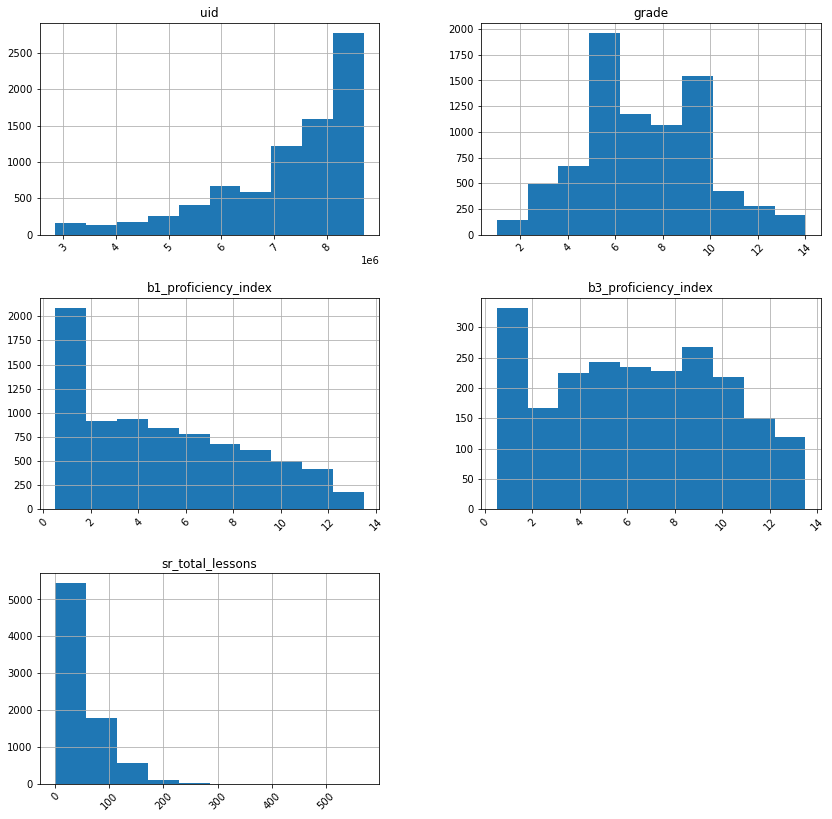

In [73]:
#Exploring the distribution in the data very generally
rpdemo.hist(figsize=(14,14), xrot=45)
plt.show()

**This baseline exploration informs me that grades 5 and 9 appear to be the most frequent users of the program. The change in the proficiency index suggests that the students are making gains in their reading ability. A deeper analysis could be done to refine the bins in sr_total_lessons.**

In [79]:
#Describe the data with summary statistics
rpdemo.describe()

,uid,grade,b1_proficiency_index,b3_proficiency_index,sr_total_lessons
count,7.944000e+03,7944.000000,7944.000000,2186.000000,7944.000000
mean,7.267867e+06,7.214376,4.891881,6.304712,44.780967
std,1.325937e+06,2.600514,3.643363,3.737708,47.105196
min,2.846900e+06,1.000000,0.500000,0.500000,0.000000
25%,6.642300e+06,5.000000,1.500000,3.300000,7.000000
50%,7.801150e+06,7.000000,4.400000,6.300000,32.000000
75%,8.260125e+06,9.000000,7.725000,9.300000,68.000000
max,8.703100e+06,14.000000,13.500000,13.500000,570.000000


In [81]:
#Describe the object data in 'sr_lesson_group_messy'
rpdemo.describe(include='object')

,sr_lesson_group_messy
count,7332
unique,4
top,1 to 40
freq,3482


In [157]:
# Create the new field for proficiency gain and append the database.
rpdemo['b3_proficiency_gain'] = rpdemo['b3_proficiency_index'] - rpdemo['b1_proficiency_index'] 
print(rpdemo.columns.values)
rpdemo.head(5)

['uid' 'grade' 'b1_proficiency_index' 'b3_proficiency_index'
 'sr_total_lessons' 'sr_lesson_group_messy' 'b3_proficiency_gain']


,uid,grade,b1_proficiency_index,b3_proficiency_index,sr_total_lessons,sr_lesson_group_messy,b3_proficiency_gain
0,2846900,11,11.7,NaN,102,81 to 120,NaN
1,2890000,12,0.5,NaN,133,NaN,NaN
2,2913600,5,6.0,NaN,35,1 to 40,NaN
3,2914400,7,5.3,7.9,147,NaN,2.6
4,2965500,4,1.9,5.5,39,1 to 40,3.6


In [42]:
#Next I will represent the same change as a percentage.
rpdemo['b3_proficiency_gain_percent'] = ((rpdemo['b3_proficiency_index'] - rpdemo['b1_proficiency_index']) / rpdemo['b1_proficiency_index'])
print(rpdemo.columns.values)
rpdemo.head(5)

['uid' 'grade' 'b1_proficiency_index' 'b3_proficiency_index'
 'sr_total_lessons' 'sr_lesson_group_messy' 'b3_proficiency_gain'
 'b3_proficiency_gain_percent']


,uid,grade,b1_proficiency_index,b3_proficiency_index,sr_total_lessons,sr_lesson_group_messy,b3_proficiency_gain,b3_proficiency_gain_percent
0,2846900,11,11.7,NaN,102,81 to 120,NaN,NaN
1,2890000,12,0.5,NaN,133,NaN,NaN,NaN
2,2913600,5,6.0,NaN,35,1 to 40,NaN,NaN
3,2914400,7,5.3,7.9,147,NaN,2.6,0.490566
4,2965500,4,1.9,5.5,39,1 to 40,3.6,1.894737


In [45]:
#Clean the dataframe by removing any rows that have null values as they will skew the data and do not provide useful information for the analysis.
rpclean = rpdemo.dropna(axis=0)
print(rpclean.columns.values)
rpclean.head(5)

['uid' 'grade' 'b1_proficiency_index' 'b3_proficiency_index'
 'sr_total_lessons' 'sr_lesson_group_messy' 'b3_proficiency_gain'
 'b3_proficiency_gain_percent']


,uid,grade,b1_proficiency_index,b3_proficiency_index,sr_total_lessons,sr_lesson_group_messy,b3_proficiency_gain,b3_proficiency_gain_percent
4,2965500,4,1.9,5.5,39,1 to 40,3.6,1.894737
20,3014800,10,5.7,6.0,66,41 to 80,0.3,0.052632
23,3016900,9,8.9,3.5,4,1 to 40,-5.4,-0.606742
41,3047900,10,8.0,9.9,56,41 to 80,1.9,0.237500
129,3304900,7,0.5,0.5,57,41 to 80,0.0,0.000000


**When we remove null values from the data we can observe an approximately normal distibution with most student gains falling between 0 and 2.5 proficiency index values.**

(array([  5.,  13.,  34.,  81., 266., 687., 501., 220.,  65.,  23.,   4.,
          3.]),
 array([-8.1       , -6.53333333, -4.96666667, -3.4       , -1.83333333,
        -0.26666667,  1.3       ,  2.86666667,  4.43333333,  6.        ,
         7.56666667,  9.13333333, 10.7       ]),
 <BarContainer object of 12 artists>)

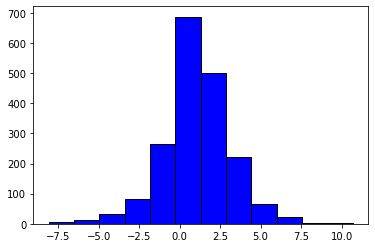

In [52]:
plt.hist(rpclean['b3_proficiency_gain'], color = 'blue', edgecolor = 'black',
         bins = 12)

In [87]:
#Look at correlation between variables
rpcorr = rpdemo.corr()
print(rpcorr)

                           uid     grade  b1_proficiency_index  \
uid                   1.000000 -0.189106             -0.175917   
grade                -0.189106  1.000000              0.415382   
b1_proficiency_index -0.175917  0.415382              1.000000   
b3_proficiency_index -0.130928  0.335885              0.831524   
sr_total_lessons     -0.067975 -0.147736             -0.083551   

                      b3_proficiency_index  sr_total_lessons  
uid                              -0.130928         -0.067975  
grade                             0.335885         -0.147736  
b1_proficiency_index              0.831524         -0.083551  
b3_proficiency_index              1.000000         -0.020296  
sr_total_lessons                 -0.020296          1.000000  


**Our strongest correlation values are between b1_proficiency and b3_proficiency which makes sense because they are related. This is read to interpret so lets look at a visualization.**

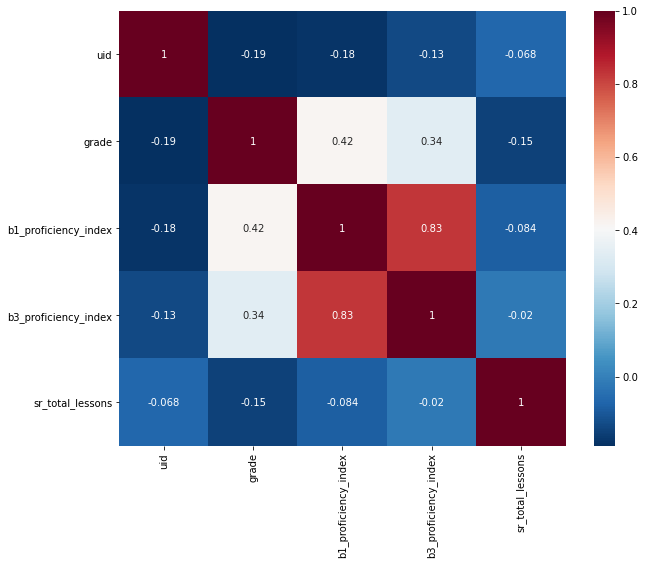

In [89]:
#Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(rpcorr, cmap='RdBu_r', annot=True)
plt.show()

**Now we can easily observe the correlation between the b1 index and the b3 index.**

<AxesSubplot:xlabel='sr_total_lessons', ylabel='b3_proficiency_index'>

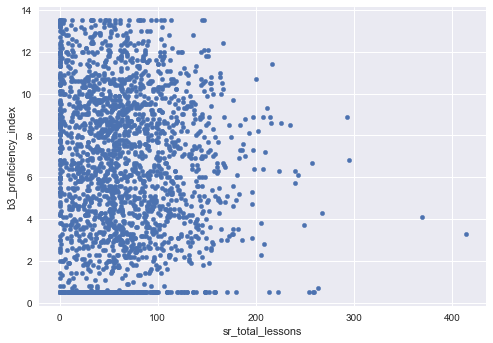

In [148]:
#Finally lets look at the relationship between usage and b3 proficiency index.
rpdemo.plot.scatter(x='sr_total_lessons', y='b3_proficiency_index')

<AxesSubplot:xlabel='sr_total_lessons', ylabel='b3_proficiency_index'>

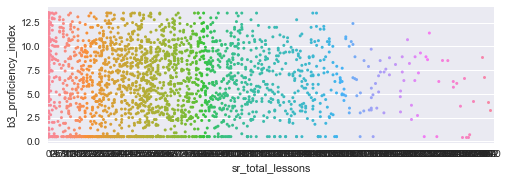

In [154]:
plt.subplot(2,1,1)
sns.stripplot(x='sr_total_lessons', y='b3_proficiency_index', data=rpdemo, jitter=True, size=3)

**The scatter plots do not show a clear relation between usage as measured by the sr_total_lessons and b3_proficiency_index. This may be due to users who have lower proficiency are targeted for increased use of the program. To put this another way, stronger readers may not use the program as much and therefore maintain a high index with less usage.**

# Summary
 **A short exploratory analysis of the data sample illustrates that 5th and 9th grades are some of the larger user groups and that users are making gains between their b1 and b3 index scores. These gains appear relatively normal when null values are excluded. There exists a correlation in students' b1 index values and b3 index values which suggests that gains can be predicted with in a range from formative assessment data. Finally, this initial comparison of student usage to b3 proficiency does not clearly illustrate higher proficiency from greater use. This could be due to implementation which targets students that are already performing in the lower index range. A more in depth and accurate measure will need to be conducted which clearly shows usage related to gains.**